In [1]:
# import libraries
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import matplotlib.pyplot as plt
import seaborn as sns
import copy, time, matplotlib, sys

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, Dataset, Subset
from torchsummary import summary

import torchvision
import torchvision.transforms as T

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
# plt.rcParams.update({'font.size':11})

In [ ]:
# use GPU if available
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

# Anatomy of a torch dataset and dataloader

## Datasets

In [ ]:
# create some data in numpy
nObservations = 100
nFeatures = 20

data = np.random.randn(nObservations, nFeatures)

In [ ]:
# Convert to pytorch tensor
data_tensor = torch.tensor(data)

# print out some information
print('Numpy data:')
print(type(data))
print(data.shape)
print(data.dtype)
print()

print('Tensor data:')
print(type(data_tensor))
print(data_tensor.shape)
print(data.dtype)

Numpy data:
<class 'numpy.ndarray'>
(100, 20)
float64

Tensor data:
<class 'torch.Tensor'>
torch.Size([100, 20])
float64


In [ ]:
# Sometimes you need to convert data types
data_tensor2 = torch.tensor(data).float()
print(data_tensor2.dtype)

# "long" is for ints
data_tensor3 = torch.tensor(data).long()
print(data_tensor3.dtype)

torch.float32
torch.int64


In [ ]:
# Convert tensor into PyTorch Datasets

# dataset = TensorDataset(data) # not a tensor!
dataset = TensorDataset(data_tensor)

# dataset is a two-element tuple comprising data, labels
dataset.tensors

(tensor([[ 0.3569, -0.3167,  0.1626,  ..., -0.5064,  0.7996,  1.6438],
         [-0.5856, -0.2602, -0.3417,  ...,  0.1974, -0.3433,  2.4370],
         [ 0.2119,  1.3658, -0.0776,  ..., -0.6461, -0.3366,  0.8599],
         ...,
         [ 1.0469,  0.1774,  0.9124,  ..., -0.6040, -0.1991, -1.2359],
         [-0.3709,  0.5926,  0.1703,  ..., -0.2283, -0.0531,  1.5360],
         [-0.2283, -1.8276, -0.5442,  ...,  0.8659,  0.7985, -1.1916]],
        dtype=torch.float64),)

In [ ]:
dataset.tensors[0]

tensor([[ 0.3569, -0.3167,  0.1626,  ..., -0.5064,  0.7996,  1.6438],
        [-0.5856, -0.2602, -0.3417,  ...,  0.1974, -0.3433,  2.4370],
        [ 0.2119,  1.3658, -0.0776,  ..., -0.6461, -0.3366,  0.8599],
        ...,
        [ 1.0469,  0.1774,  0.9124,  ..., -0.6040, -0.1991, -1.2359],
        [-0.3709,  0.5926,  0.1703,  ..., -0.2283, -0.0531,  1.5360],
        [-0.2283, -1.8276, -0.5442,  ...,  0.8659,  0.7985, -1.1916]],
       dtype=torch.float64)

In [ ]:
len(dataset)

100

In [ ]:
# Let's try again with labels
labels = torch.ceil(torch.linspace(.01, 4, nObservations))

# transform to an actual matrix (column vector)
labels = labels.reshape((len(labels), 1))
# print(labels)

# now make another dataset
dataset = TensorDataset(data_tensor, labels)
print(len(dataset))
print(dataset[10])
print(dataset.tensors[0].size())
print(dataset.tensors[1].size())

# for comparison
print( np.shape(np.random.randint(5,size=nObservations)) )

100
(tensor([ 1.4503, -0.8425, -0.9315, -0.1856, -0.0848,  2.4241,  1.2588, -0.0901,
        -0.8511,  1.5849, -0.5110,  0.4357, -0.8756, -1.9588,  0.6686, -0.1874,
         0.8910,  0.2278,  0.6299, -0.2023], dtype=torch.float64), tensor([1.]))
torch.Size([100, 20])
torch.Size([100, 1])
(100,)


## DataLoaders

In [ ]:
# create a dataloader object
batchsize =25
dataloader = DataLoader(dataset, batch_size=batchsize, shuffle=True, drop_last=True)

dataloader.dataset.tensors[0].size()

torch.Size([100, 20])

In [ ]:
# sizes of each batch
for dat, labs in dataloader:
    print('BATCH INFO:')
    print(dat.size())
    print(labs.size())
    print()

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])

BATCH INFO:
torch.Size([25, 20])
torch.Size([25, 1])



In [ ]:
# inspect the labels
for dat, labs in dataloader:
    print(labs.T)
    print()

# try again with shuffling (off/on) (shuffling happens during iterations)

tensor([[2., 4., 3., 3., 2., 4., 2., 4., 1., 3., 3., 2., 4., 2., 1., 1., 1., 3.,
         1., 3., 1., 1., 3., 1., 2.]])

tensor([[3., 3., 1., 2., 2., 1., 4., 4., 3., 3., 2., 4., 4., 1., 1., 4., 1., 2.,
         1., 3., 4., 2., 1., 2., 4.]])

tensor([[2., 2., 4., 4., 2., 1., 3., 4., 4., 1., 3., 3., 4., 2., 2., 3., 4., 2.,
         2., 4., 3., 1., 3., 1., 2.]])

tensor([[1., 4., 3., 1., 3., 1., 3., 2., 4., 4., 1., 1., 2., 2., 4., 4., 3., 1.,
         4., 3., 2., 3., 2., 3., 4.]])



In [ ]:
# To get only one batch (e.g., for testing)
dat, labs = next(iter(dataloader))
labs

# Data size and network size

In [ ]:
''' The relationship between the amount of training data and DL architecture.

- Different models, same number of nodes: deeper networks have fewer parameters.

- Train models to classify the 3-category qwerties.
- Parametrically vary the depth of the models, while keeping the total number of units constant (80 in total).
- Parametrically vary the amount of data, from N=50 to 550.
- See what happens!

* Interpretation:
- Learning depends more on the architecture and the nature of the problem, than on the number of parameters.

'''

## The data

In [ ]:
# a function that creates data
def createSomeData(nPerClust):

    A = [1,1]
    B = [5,1]
    C = [4,4]

    # generate data
    a = [ A[0]+np.random.randn(nPerClust), A[1]+np.random.randn(nPerClust) ]
    b = [ B[0]+np.random.randn(nPerClust), B[1]+np.random.randn(nPerClust) ]
    c = [ C[0]+np.random.randn(nPerClust), C[1]+np.random.randn(nPerClust) ]

    # true labels
    labels_np = np.hstack((
        np.zeros((nPerClust)),
        np.ones((nPerClust)),
        1+np.ones((nPerClust))
    ))

    # concatenate into a matrix
    data_np = np.hstack((a,b,c)).T

    # NEW: put all outputs into a dictionary
    output = {}
    output['data'] = torch.tensor(data_np).float()
    output['labels'] = torch.tensor(labels_np).long()

    # split the data
    train_data, test_data, train_labels, test_labels = train_test_split(output['data'], output['labels'], test_size=.1)

    # convert into PyTorch Datasets
    trainset = TensorDataset(train_data, train_labels)
    testset = TensorDataset(test_data, test_labels)

    # translate into dataloader objects
    batch_size=8
    output['train_loader'] = DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last=True)
    output['test_loader'] = DataLoader(testset, batch_size=testset.tensors[0].shape[0])

    return output

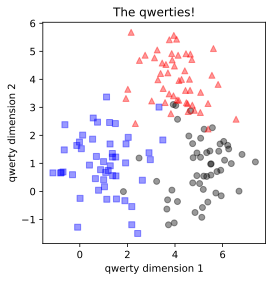

In [ ]:
# Check that the function works

theData = createSomeData(50)

data = theData['data']
labels = theData['labels']

# show the data
fig = plt.figure(figsize=(4,4))
plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs', alpha=.4)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko', alpha=.4)
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], 'r^', alpha=.4)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

## Create the model

In [ ]:
def createTheQwertyNet(nUnits, nLayers):

    class qwertyNet(nn.Module):
        def __init__(self, nUnits, nLayers):
            super().__init__()

            # create dictionary to store the layers
            self.layers = nn.ModuleDict()
            self.nLayers = nLayers

            # input layer
            self.layers['input'] = nn.Linear(2, nUnits)

            # hidden layers
            for i in range(1, self.nLayers):
                self.layers[f'hidden{i}'] = nn.Linear(nUnits, nUnits)

            # output layer
            self.layers['output'] = nn.Linear(nUnits, 3)

        def forward(self, x):
            x = F.relu( self.layers['input'](x) )

            for i in range(1, self.nLayers):
                x = F.relu( self.layers[f'hidden{i}'](x) )

            # return output
            x = self.layers['output'](x)
            return x

    net = qwertyNet(nUnits, nLayers)

    lossfunc = nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(net.parameters(), lr=.01)

    return net, lossfunc, optimizer

In [ ]:
# test the model with fake input
nUnitsPerLayer = 12
nLayers = 4

net, lossfunc, optimizer = createTheQwertyNet(nUnitsPerLayer, nLayers)
print(net)

qwertyNet(
  (layers): ModuleDict(
    (input): Linear(in_features=2, out_features=12, bias=True)
    (hidden1): Linear(in_features=12, out_features=12, bias=True)
    (hidden2): Linear(in_features=12, out_features=12, bias=True)
    (hidden3): Linear(in_features=12, out_features=12, bias=True)
    (output): Linear(in_features=12, out_features=3, bias=True)
  )
)


In [ ]:
# input is ten samples
input = torch.rand(10,2)
net(input)

tensor([[-0.3772, -0.3014,  0.0336],
        [-0.3785, -0.2984,  0.0305],
        [-0.3779, -0.2962,  0.0303],
        [-0.3737, -0.2894,  0.0289],
        [-0.3772, -0.3070,  0.0400],
        [-0.3796, -0.2956,  0.0295],
        [-0.3785, -0.3053,  0.0385],
        [-0.3763, -0.3053,  0.0377],
        [-0.3774, -0.3044,  0.0373],
        [-0.3718, -0.3125,  0.0440]], grad_fn=<AddmmBackward0>)

In [ ]:
# a function to count the number of units
def count_units(model):
    total_units = 0
    for layer in model.modules():
        if isinstance(layer, torch.nn.modules.linear.Linear):
            total_units += layer.in_features
    return total_units

nNodesInModel = 80
layersRange = [1,5,10,20]

# print out the model architectures
for l_idx, layers in enumerate(layersRange):

    # create a model
    unitsperlayer = int(nNodesInModel // layersRange[l_idx])
    net = createTheQwertyNet(unitsperlayer, layers)[0]

    # count and print the results
    print(f'Units/layer: {unitsperlayer}, layers: {layers}, Total count: {count_units(net)}')

Units/layer: 80, layers: 1, Total count: 82
Units/layer: 16, layers: 5, Total count: 82
Units/layer: 8, layers: 10, Total count: 82
Units/layer: 4, layers: 20, Total count: 82


## A function that trains the model

In [ ]:
def function2trainTheModel(nUnits, nLayers):

    numepochs = 50

    net, lossfunc, optimizer = createTheQwertyNet(nUnits, nLayers)

    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    for epochi in range(numepochs):

        batchAcc = []
        batchLoss = []
        for X, y in train_loader:
            yHat = net(X)
            loss = lossfunc(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            batchAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

        trainAcc.append(np.mean(batchAcc))
        losses[epochi] = np.mean(batchLoss)

        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = net(X)

        testAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

    return trainAcc, testAcc, losses, net

In [ ]:
# Test the model once with a bit of data, just to make sure the code works.

# generate data
theData = createSomeData(200)
train_loader = theData['train_loader']
test_loader = theData['test_loader']

# run the model
trainAcc, testAcc, losses, net = function2trainTheModel(80,1)

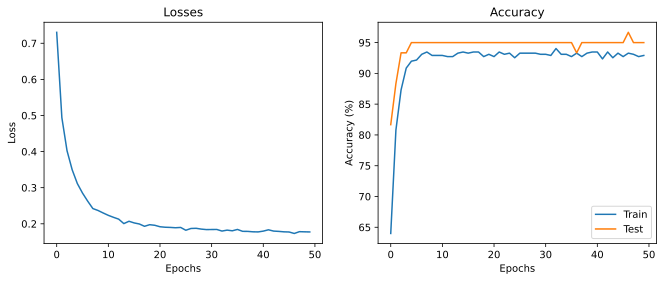

In [ ]:
# show the results!
fig, ax = plt.subplots(1,2,figsize=(11,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_title('Losses')

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epochs')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

## Now for the experiment!

In [ ]:
# before the experiment, configure and confirm the metaparameters

# specify the parameters for the model
nNodesInModel = 80
layersRange = [1,5,10,20]
nDataPoints = np.arange(50,551,50)

# create a legend for later plotting
legend = []

# print out the model architectures
for l_idx, layers in enumerate(layersRange):

    # create a model
    unitsperlayer = int(nNodesInModel/layersRange[l_idx])
    net = createTheQwertyNet(unitsperlayer, layers)[0]

    # count its parameters
    nparams = np.sum([ p.numel() for p in net.parameters() if p.requires_grad ])

    legend.append('%s layers, %s units, %s params' %(layers, unitsperlayer, nparams))
    print('This model will have %s layers, each with %s units, totalling %s parameters' %(layers, unitsperlayer, nparams))

This model will have 1 layers, each with 80 units, totalling 483 parameters
This model will have 5 layers, each with 16 units, totalling 1187 parameters
This model will have 10 layers, each with 8 units, totalling 699 parameters
This model will have 20 layers, each with 4 units, totalling 407 parameters


In [ ]:
# initialize results matrix
results = np.zeros((len(nDataPoints), len(layersRange), 2))

for d_idx, pnts in enumerate(nDataPoints):

    # create data
    theData = createSomeData(pnts)
    train_loader = theData['train_loader']
    test_loader = theData['test_loader']

    # now loop over layers
    for l_idx, layers in enumerate(layersRange):

        unitsperlayer = int(nNodesInModel/layersRange[l_idx])
        trainAcc, testAcc, losses, net = function2trainTheModel(unitsperlayer, layers)

        # average of last 5 accuracies and losses
        results[d_idx, l_idx, 0] = np.mean(testAcc[-5:])
        results[d_idx, l_idx, 1] = torch.mean(losses[-5:]).item()

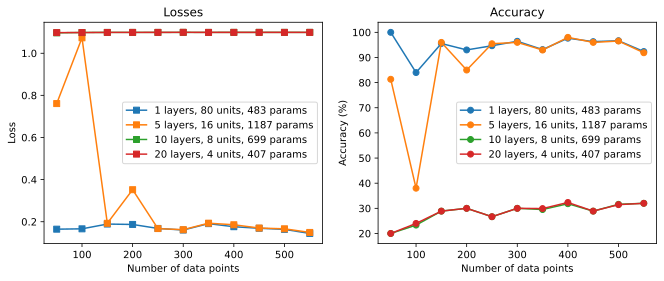

In [ ]:
# show the results!

fig,ax = plt.subplots(1,2,figsize=(11,4))
ax[0].plot(nDataPoints,results[:,:,1],'s-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Number of data points')
ax[0].legend(legend)
ax[0].set_title('Losses')

ax[1].plot(nDataPoints,results[:,:,0],'o-')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Number of data points')
ax[1].set_title('Accuracy')
ax[1].legend(legend)
plt.show()

# Unbalanced data

## Import and process the data

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')
data = data[data['total sulfur dioxide']<200]

# z-score all columns except for quality
cols2zscore = data.keys()
cols2zscore = cols2zscore.drop('quality')
data[cols2zscore] = data[cols2zscore].apply(stats.zscore)

## A function to process the data by quality metric

In [ ]:
def createAdataset(qualThreshold):

    # create a new column for binarized (boolean) quality
    data['boolQuality'] = 0

    # IMPORTANT: This is the main piece of this code!
    tmp = (data['quality']>qualThreshold).astype(int)
    data['boolQuality'] = tmp

    # convert from pandas data frame to tensor
    data_tensor = torch.tensor(data[cols2zscore].values).float()
    labels = torch.tensor(data['boolQuality'].values).float()
    labels = labels[:,None]

    # split the data
    train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, labels, test_size=.1)

    # convert into PyTorch Datasets
    trainset = TensorDataset(train_data, train_labels)
    testset = TensorDataset(test_data, test_labels)

    # translate into dataloader objects
    batchsize=8
    train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(testset, batch_size=testset.tensors[0].shape[0])

    return train_loader, test_loader

In [ ]:
# test the dataset and the number of samples

# note that the data are roughly balanced with thresh-5, not 4 or 6
train_loader, test_loader = createAdataset(6)

# get number of high/low quality wines
qualityRatings = train_loader.dataset.tensors[1].detach()
print('%s low-rated wines' %torch.sum(qualityRatings==0).item())
print('%s high-rated wines' %torch.sum(qualityRatings==1).item())

1250 low-rated wines
187 high-rated wines


## The DL parts: class for the model, and a function to train it

In [ ]:
# create a class for the model

class ANNwine(nn.Module):
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(11,16)
        self.fc1 = nn.Linear(16,32)
        self.fc2 = nn.Linear(32,32)
        self.output = nn.Linear(32,1)

    def forward(self, x):
        x = F.leaky_relu(self.input(x))
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        return self.output(x)

In [ ]:
# a function that trains the model

numepochs = 500

def trainTheModel(winenet):

    lossfunc = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(winenet.parameters(), lr=.001)

    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    for epochi in range(numepochs):

        batchAcc = []
        batchLoss = []
        for X, y in train_loader:
            yHat = winenet(X)
            loss = lossfunc(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            batchAcc.append( 100 * torch.mean(((yHat>0)==y).float()).item() )

        trainAcc.append(np.mean(batchAcc))
        losses[epochi] = np.mean(batchLoss)

        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = winenet(X)
        testAcc.append( 100 * torch.mean(((yHat>0)==y).float()).item() )

    return trainAcc, testAcc, losses, winenet

In [ ]:
# create the data
train_loader, test_loader = createAdataset(5)

# create a model and train it
winenet = ANNwine()
trainAcc, testAcc, losses, winenet = trainTheModel(winenet)

In [ ]:
# compute accuracy per quality type
X, y = next(iter(test_loader))
yHat = winenet(X)
itemAccuracy = (((yHat>0)==y).float())

perQualAcc = [ 100 * torch.mean(itemAccuracy[y==0]).item(), 100 * torch.mean(itemAccuracy[y==1]).item() ]
perQualAcc = [round(x, 2) for x in perQualAcc]
perQualAcc

[82.28, 82.72]

## Now run the entire experiment!

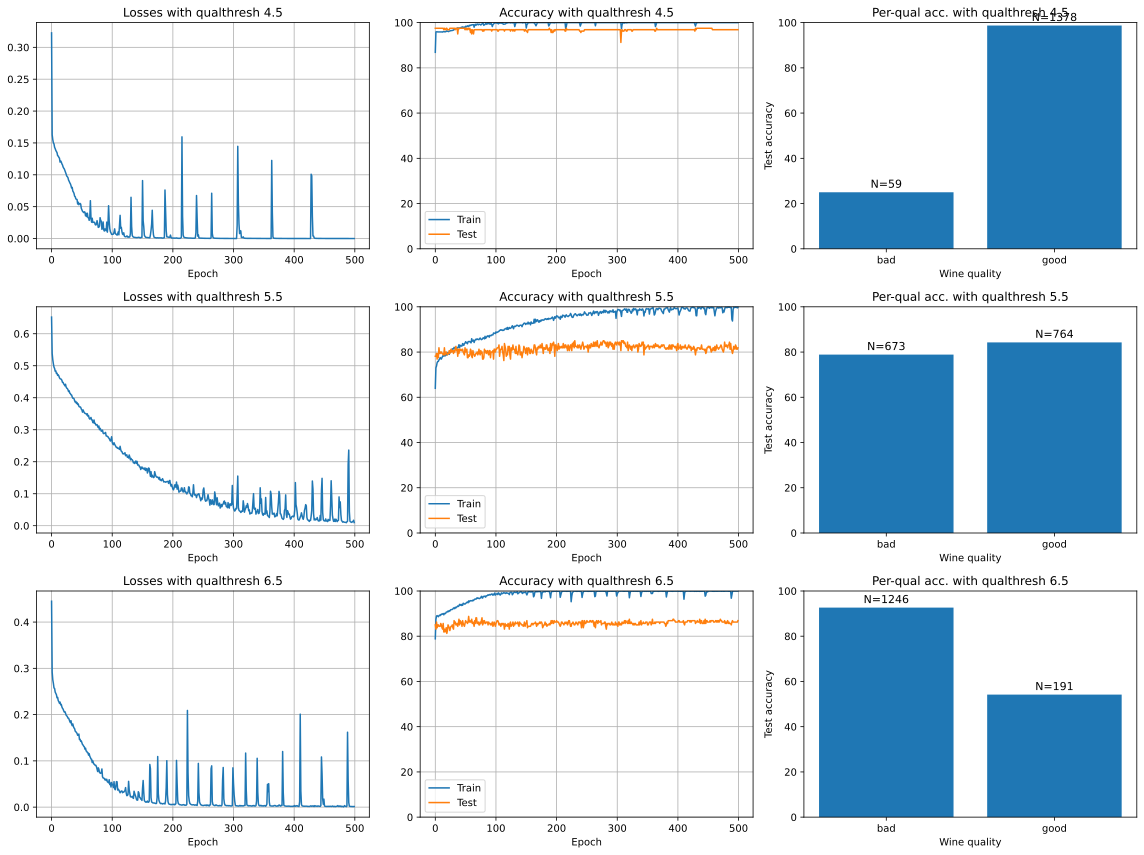

In [ ]:
# setup the figure
fig, ax = plt.subplots(3,3,figsize=(16,12))

# the quality thresholts
qualityThresholds = [4,5,6]

# loop over quality thresholds
for quali in range(len(qualityThresholds)):

    # create the data and model, and train it
    train_loader, test_loader = createAdataset( qualityThresholds[quali] )
    winenet = ANNwine()
    trainAcc, testAcc, losses, winenet = trainTheModel(winenet)

    # compute accuracy per quality type
    X, y = next(iter(test_loader))
    itemAccuracy = (((winenet(X)>0)==y).float())
    perQualAcc = [ 100 * torch.mean(itemAccuracy[y==0]).item(), 100 * torch.mean(itemAccuracy[y==1]).item() ]

    # plot losses
    ax[quali, 0].plot(losses)
    ax[quali, 0].set_title('Losses with qualthresh ' + str(qualityThresholds[quali] + .5))
    ax[quali, 0].set_xlabel('Epoch')
    ax[quali, 0].grid()

    # plot overall accuracy
    ax[quali, 1].plot(trainAcc, label='Train')
    ax[quali, 1].plot(testAcc, label='Test')
    ax[quali, 1].set_title('Accuracy with qualthresh ' + str(qualityThresholds[quali] + .5))
    ax[quali, 1].legend()
    ax[quali, 1].set_xlabel('Epoch')
    ax[quali, 1].set_ylim([0,100])
    ax[quali, 1].grid()

    # plot the per-quality accuracy
    bh = ax[quali, 2].bar(['bad', 'good'], perQualAcc)
    ax[quali, 2].set_ylim([0,100])
    ax[quali, 2].set_xlabel('Wine quality')
    ax[quali, 2].set_ylabel('Test accuracy')
    ax[quali, 2].set_title('Per-qual acc. with qualthresh ' + str(qualityThresholds[quali] + .5))

    # print the counts on tp of each bar
    for i, r in enumerate(bh):
        N = torch.sum(train_loader.dataset.tensors[1]==i).item()
        ax[quali,2].text(r.get_x()+r.get_width()/2, r.get_height()+1,
                         'N=%s'%N, ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# What to do about unbalanced designs?

In [ ]:
''' The situations where unbalanced designs occurs and does not occur.
Several strategies for dealing with unbalanced designs.

* Which datasets are unbalanced?
- Fraud detection. Fraud is rare.
- Disease prediction. Cancers, tumors, diseases, etc., are rare.
- Basically any time you want to predict or classify rare or unusual things...

* Strategies for dealing with unbalanced data
1) Get more data. The best solution, but not always possible.
2) Undersample. Throw out lots of data to match sample sizes. Not really the best idea, unless  you have a lot of data to work with.
3) Oversample. Create multiple copies of the rare data. Increases risk of overfitting.
4) Data augmentation. Add new features as nonlinear transformations of existing data. Usually feasible for images.
5) Create synthetic samples. Can be good if the fake data look like real data.
  SMOTE: synthetic minority oversampling technique.
6) Consider whether a non-DL solution would be better...
'''

# Data oversampling in MNIST

In [ ]:
'''
Train MNIST using small sample sizes 500 to 4000).
Train using the unique samples, and with a doubling of the samples
Think critically about the results.
=> That oversampling can lead to suspiciously good performance... (not valid)
'''

## A function that returns a dataset with a specified size

In [ ]:
# import dataset
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter=',')

# now for the function
def makeTheDataset(N, doubleTheData=False):

    # extract labels
    labels = dataFull[:N,0]
    data = dataFull[:N, 1:]

    # normalize the data to a range of [0 1]
    dataNorm = data / np.max(data)

    # make an exact copy of ALL the data
    # if doubleTheData:
    #     dataNorm = np.concatenate((dataNorm, dataNorm), axis=0)
    #     labels = np.concatenate((labels, labels), axis=0)

    # convert to tensor
    data_tensor = torch.tensor(dataNorm).float()
    labels_tensor = torch.tensor(labels).long()

    # split the data
    train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, labels_tensor, test_size=.1)

    # make an exact copy of the TRAIN data
    if doubleTheData:
        train_data = torch.cat((train_data, train_data), axis=0)
        train_labels = torch.cat((train_labels, train_labels), axis=0)

    # convert into PyTorch Datasets
    trainset = TensorDataset(train_data, train_labels)
    testset = TensorDataset(test_data, test_labels)

    # translate into dataloader objects
    batchsize= 20
    train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
    test_loader = DataLoader(testset, batch_size=testset.tensors[0].shape[0])

    return train_loader, test_loader

In [ ]:
# Check the sizes
r, t = makeTheDataset(200, False)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

r, t = makeTheDataset(200, True)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

torch.Size([180, 784])
torch.Size([20, 784])
torch.Size([360, 784])
torch.Size([40, 784])


In [ ]:
# Check the sizes
r, t = makeTheDataset(200, False)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

r, t = makeTheDataset(200, True)
print(r.dataset.tensors[0].shape)
print(t.dataset.tensors[0].shape)

torch.Size([180, 784])
torch.Size([20, 784])
torch.Size([360, 784])
torch.Size([20, 784])


## Create the DL model

In [ ]:
def createTheMNISTNet():

    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            self.input = nn.Linear(784, 64)
            self.fc1 = nn.Linear(64,32)
            self.fc2 = nn.Linear(32,32)
            self.output = nn.Linear(32,10)

        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return self.output(x)

    net = mnistNet()
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=.01)

    return net, lossfunc, optimizer

## Create a function that trains the model

In [ ]:
def function2trainTheModel():

    numepochs = 50

    net, lossfunc, optimizer = createTheMNISTNet()

    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    for epochi in range(numepochs):

        batchAcc = []
        batchLoss = []
        for X, y in train_loader:
            yHat = net(X)
            loss = lossfunc(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            batchAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

        trainAcc.append(np.mean(batchAcc))
        losses[epochi] = np.mean(batchLoss)

        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = net(X)
        testAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

    return trainAcc, testAcc, losses, net

## Run the model once to confirm that it works

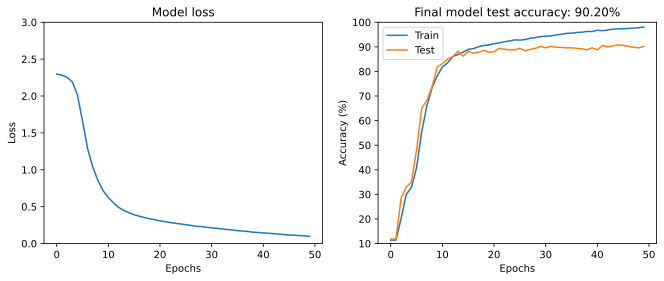

In [ ]:
# generate a dataset
train_loader, test_loader = makeTheDataset(5000)

# test it
trainAcc, testAcc, losses, net = function2trainTheModel()

# plot the results
fig, ax = plt.subplots(1,2,figsize=(11,4))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## Run ann experiment showing better performance with increased N

In [ ]:
# list of data sample sizes
sample_sizes = np.arange(500, 4001, 500) # 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000

# initialize results matrices
results_single = np.zeros((len(sample_sizes), 3))
results_double = np.zeros((len(sample_sizes), 3))

for idx, size in enumerate(sample_sizes):

    # without doubling the data ------------------------------------------- #

    # generate a dataset and train the model
    train_loader, test_loader = makeTheDataset(size, False)
    trainAcc, testAcc, losses, net = function2trainTheModel()

    # grab the results
    results_single[idx, 0] = np.mean(trainAcc[-5:])
    results_single[idx, 1] = np.mean(testAcc[-5:])
    results_single[idx, 2] = torch.mean(losses[-5:]).item()

    # with doubling the data ------------------------------------------- #

    # generate a dataset and train the model
    train_loader, test_loader = makeTheDataset(size, True)
    trainAcc, testAcc, losses, net = function2trainTheModel()

    # grab the results
    results_double[idx, 0] = np.mean(trainAcc[-5:])
    results_double[idx, 1] = np.mean(testAcc[-5:])
    results_double[idx, 2] = torch.mean(losses[-5:]).item()

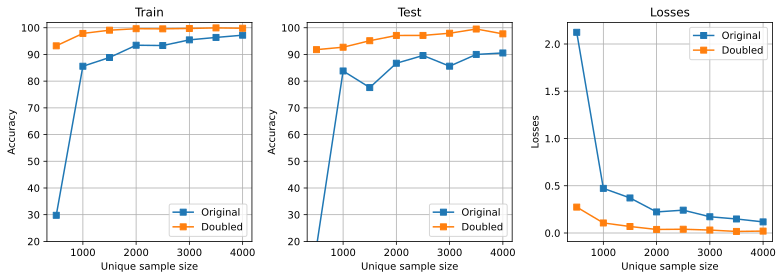

In [ ]:
# Let's see what the results look like!
fig, ax = plt.subplots(1,3,figsize=(11,4))

# axis and title labels
titles = ['Train', 'Test', 'Losses']
yaxlabels = ['Accuracy', 'Accuracy', 'Losses']

# common features
for i in range(3):

    # plot the lines
    ax[i].plot(sample_sizes, results_single[:,i], 's-', label='Original')
    ax[i].plot(sample_sizes, results_double[:,i], 's-', label='Doubled')

    # make it look nicer
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel('Unique sample size')
    ax[i].grid('on')

    if i<2:
        ax[i].set_ylim([20,102])

plt.tight_layout()
plt.show()

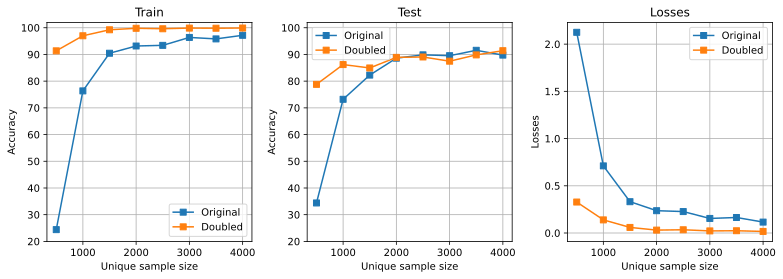

In [ ]:
# Let's see what the results look like!
fig, ax = plt.subplots(1,3,figsize=(11,4))

# axis and title labels
titles = ['Train', 'Test', 'Losses']
yaxlabels = ['Accuracy', 'Accuracy', 'Losses']

# common features
for i in range(3):

    # plot the lines
    ax[i].plot(sample_sizes, results_single[:,i], 's-', label='Original')
    ax[i].plot(sample_sizes, results_double[:,i], 's-', label='Doubled')

    # make it look nicer
    ax[i].set_ylabel(yaxlabels[i])
    ax[i].set_title(titles[i])
    ax[i].legend()
    ax[i].set_xlabel('Unique sample size')
    ax[i].grid('on')

    if i<2:
        ax[i].set_ylim([20,102])

plt.tight_layout()
plt.show()

# Data noise augmentation (with devset+test)

In [ ]:
''' Data noise augmentation
- How to oversample without being exactly redundant.
- That noise augmentation can improve performance.
- Why noise augmentation can also help prevent overfitting ("data regularization").

- Doubled samples have white noise added, with a range of [0,.5] (this is half of the image range).
- Think critically about the results.

* Noise augmentation as regularization
- The model must also learn to represent noisy samples.
- This helps with generalization because the model is less able to memorize specific samples.
- Question: Could we have added Gaussian instead of uniform noise?
- Note: Adding noise to images in PyTorch is commonly done with a transform function. (More on this in the CNN section!)
'''

## A function that returns a dataset with a specified size

In [ ]:
# import dataset
dataFull = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter=',')

# normalize the data to a range of [0 1]
dataFull[:,1:] = dataFull[:,1:] / np.max(dataFull)

# now for the function
def makeTheDataset(N, doubleTheData=False):

    # extract labels
    data = dataFull[:N, 1:]
    labels = dataFull[:N, 0]

    # make a noisy copy of ALL the data
    if doubleTheData:
        data_noise = data + np.random.random_sample(data.shape)/2
        data = np.concatenate((data, data_noise), axis=0)
        labels = np.concatenate((labels, labels), axis=0)

    # convert to tensor
    data_tensor = torch.tensor(data).float()
    labels_tensor = torch.tensor(labels).long()

    # split the data
    train_data, val_data, train_labels, val_labels = train_test_split(data_tensor, labels_tensor, test_size=.1)

    # make a noisy copy of the TRAIN data
    # if doubleTheData:
    #     train_data_noise = train_data + np.random.random_sample(train_data)/2
    #     train_data = torch.cat((train_data, train_data_noise), axis=0)
    #     train_labels = torch.cat((train_labels, train_labels), axis=0)

    # convert into PyTorch Datasets
    trainset = TensorDataset(train_data, train_labels)
    valset = TensorDataset(val_data, val_labels)

    # translate into dataloader objects
    batchsize=20
    train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
    val_loader = DataLoader(valset, batch_size=valset.tensors[0].shape[0])

    # NEW!! Create a test set (don't need a dataloader)
    test_data = torch.tensor(dataFull[N:, 1:]).float()
    test_labels = torch.tensor(dataFull[N:,0]).long()

    return train_loader, val_loader, (test_data, test_labels)

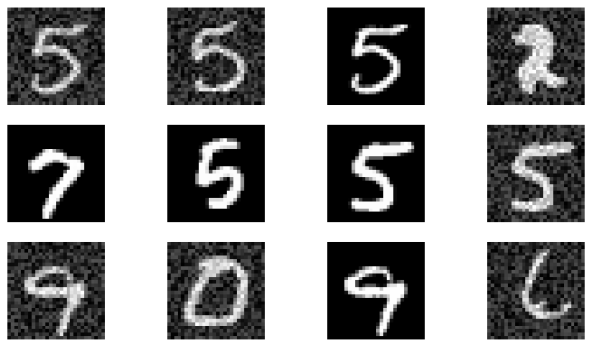

In [ ]:
# visualize the images

# get some sample data
train_loader, val_loader, testdataset = makeTheDataset(12, True)

# pop out the data matrices
img = train_loader.dataset.tensors[0].detach()

# show the numbers
fig, axs = plt.subplots(3,4,figsize=(11,6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(np.reshape(img[i, :], (28,28)), cmap='gray')
    ax.axis('off')

plt.show()

## Run an experiment showing better performance with increased N

In [ ]:
# list of data sample sizes
sample_sizes = np.arange(500,4001, 500)

# initialize results matrix
results_single = np.zeros((len(sample_sizes), 3))
results_double = np.zeros((len(sample_sizes), 3))

for idx, size in enumerate(sample_sizes):

    # without doubling the data ------------------------------------------ #

    # generate a dataset and train the model
    train_loader, val_loader, testdataset = makeTheDataset(size, False)
    trainAcc, valAcc, losses, net = function2trainTheModel()

    # grab the results
    results_single[idx, 0] = np.mean(trainAcc[-5:])
    results_single[idx, 1] = np.mean(valAcc[-5:])
    results_single[idx, 2] = torch.mean(losses[-5:]).item()

    # with doubling the data ---------------------------------------------- #

    # generate a dataset and train the model
    train_loader, val_loader, testdataset = makeTheDataset(size, True)
    trainAcc, valAcc, losses, net = function2trainTheModel()

    # grab the results
    results_double[idx, 0] = np.mean(trainAcc[-5:])
    results_double[idx, 1] = np.mean(valAcc[-5:])
    results_double[idx, 2] = torch.mean(losses[-5:]).item()

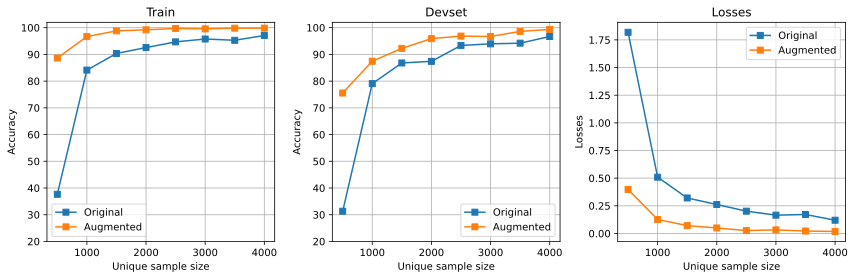

In [ ]:
# Let's see what the results look like!

fig,ax = plt.subplots(1,3,figsize=(12,4))

# axis and title labels
titles    = ['Train','Devset','Losses']
yaxlabels = ['Accuracy','Accuracy','Losses']

# common features
for i in range(3):

  # plot the lines
  ax[i].plot(sample_sizes,results_single[:,i],'s-',label='Original')
  ax[i].plot(sample_sizes,results_double[:,i],'s-',label='Augmented')

  # make it look nicer
  ax[i].set_ylabel(yaxlabels[i])
  ax[i].set_title(titles[i])
  ax[i].legend()
  ax[i].set_xlabel('Unique sample size')
  ax[i].grid('on')

  if i<2:
    ax[i].set_ylim([20,102])


plt.tight_layout()
plt.show()

## Now for test accuracy!

In [ ]:
# we need to re-run the models for N=500

sample_size=500

train_loader, val_loader, testdataset = makeTheDataset(sample_size, False)
trainAccO, valAccO, lossesO, netO = function2trainTheModel()

train_loader, val_loader, testdataset = makeTheDataset(sample_size, True)
trainAccA, valAccA, lossesA, netA = function2trainTheModel()

In [ ]:
# Now for the real test! On the test data!

# extract the test data
X, y = testdataset

# run the original model
yHat = netO(X)
testO = 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float())

# the augmented model
yHat = netA(X)
testA = 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float())

# print the results!
print(f'ORIGINAL MODEL (N={sample_size}):\n Train: {trainAccO[-1]:.2f}%, Val: {valAccO[-1]:.2f}%, Test: {testO:.2f}%\n\n')
print(f'AUGMENTED MODEL (N={sample_size}):\n Train: {trainAccA[-1]:.2f}%, Val: {valAccA[-1]:.2f}%, Test: {testA:.2f}%\n\n')

ORIGINAL MODEL (N=500):
 Train: 35.00%, Val: 29.00%, Test: 30.41%


AUGMENTED MODEL (N=500):
 Train: 93.78%, Val: 80.00%, Test: 78.53%




# Data feature augmentation

In [ ]:
''' How to augment data by creating new features as combinations of existing features.

* How to perform a t-test on experimental data to test for significant differences in performance.

* Qwerties and distance to the origin
- Qwerties natively have only two dimensions (X, Y).
- We're going to create a new feature: distance to origin.
- Visually, it is clear that this can help discriminatility.
- Will the extra feature help the network learn?

* Discussion
- Data augmentation can be a useful method for increasing discriminability of different classes.
- There is no advantage the new feature being a linear combination of existing features.
- Nonlinear combinations are better, but still not guaranteed to improve performance (because the model is nonlinear!).
- Data augmentation is common in signal processing.
- In this example, performance was already at ceiling, and the network might have learned to compute distance on its own.
'''

## Create and prepare the data

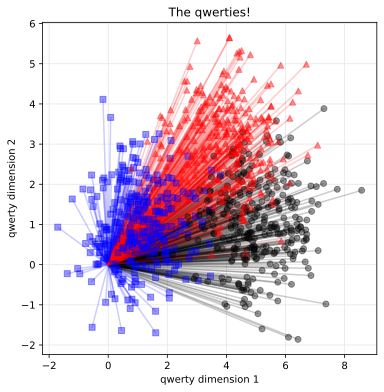

In [ ]:
# create data
nPerClust = 300
blur = 1

A = [1,1]
B = [5,1]
C = [4,3]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((
    np.zeros((nPerClust)),
    np.ones((nPerClust)),
    1+np.ones((nPerClust))
))

# concatenate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()

# show the data
fig = plt.figure(figsize=(6,6))

# draw distance to origin
color='bkr'
for i in range(len(data)):
    plt.plot([0, data[i,0]], [0,data[i,1]], color=color[labels[i]], alpha=.2)

plt.plot(data[np.where(labels==0)[0],0], data[np.where(labels==0)[0],1], 'bs', alpha=.4)
plt.plot(data[np.where(labels==1)[0],0], data[np.where(labels==1)[0],1], 'ko', alpha=.4)
plt.plot(data[np.where(labels==2)[0],0], data[np.where(labels==2)[0],1], 'r^', alpha=.4)

plt.grid(color=[.9,.9,.9])
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

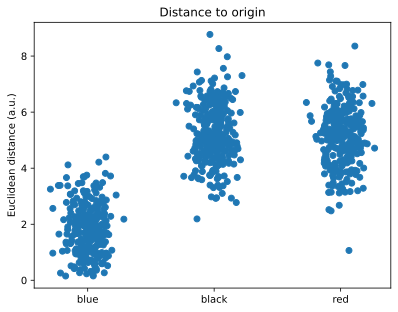

In [ ]:
# compute Euclidean distance to the origin
dist2orig = torch.sqrt( data[:,0]**2 + data[:,1]**2 )

plt.plot(labels + torch.randn(900)/10, dist2orig, 'o')
plt.xticks([0,1,2], labels=['blue', 'black', 'red'])
plt.ylabel('Euclidean distance (a.u.)')
plt.title('Distance to origin')
plt.show()

In [ ]:
# And add that to the data matrix
dataAug = torch.cat((data, dist2orig.view(len(data),1)), axis=1)

# check data sizes
print(data.shape)
print(dataAug.shape)
print()

# look at some of the data
print(dataAug)

torch.Size([900, 2])
torch.Size([900, 3])

tensor([[0.9614, 1.7304, 1.9795],
        [1.0036, 1.5010, 1.8056],
        [0.6560, 1.4184, 1.5627],
        ...,
        [3.8165, 0.9393, 3.9304],
        [4.3213, 2.5238, 5.0044],
        [5.3813, 2.3761, 5.8825]])


In [ ]:
# split the data
train_data, test_data, train_labels, test_labels = train_test_split(dataAug, labels, test_size=.1)

# convert into PyTorch Datasets
trainset = TensorDataset(train_data, train_labels)
testset = TensorDataset(test_data, test_labels)

# translate into dataloader objects
batchsize=16
train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, batch_size=testset.tensors[0].shape[0])

## Create the model

In [ ]:
def createTheQwertyNet(useExtraFeature=False):

    class qwertyNet(nn.Module):
        def __init__(self):
            super().__init__()

            if useExtraFeature:
                self.input = nn.Linear(3,8)
            else:
                self.input = nn.Linear(2,8)

            self.hidden = nn.Linear(8,8)
            self.output = nn.Linear(8,3)

        def forward(self, x):

            # by request, only use XY features
            # print(x.shape)
            if not useExtraFeature:
                x = x[:,:2]
            # print(x.shape)

            x = F.relu(self.input(x))
            x = F.relu(self.hidden(x))
            return self.output(x)

    net = qwertyNet()
    lossfunc = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(net.parameters(), lr=.001)

    return net, lossfunc, optimizer

In [ ]:
# test the model
print('Using augmented feature:')
net = createTheQwertyNet(True)[0]

net(next(iter(train_loader))[0]);

Using augmented feature:
torch.Size([16, 3])
torch.Size([16, 3])


## a function that trians the model

In [ ]:
def function2trainTheModel(useExtraFeature=False):

    numepochs = 200

    net, lossfunc, optimizer = createTheQwertyNet(useExtraFeature)

    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    for epochi in range(numepochs):

        batchAcc = []
        batchLoss = []
        for X, y in train_loader:
            yHat = net(X)
            loss = lossfunc(yHat, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchLoss.append(loss.item())
            batchAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

        trainAcc.append(np.mean(batchAcc))
        losses[epochi] = np.mean(batchLoss)

        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = net(X)

        testAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

    return trainAcc, testAcc, losses, net

## A function that plots the results

In [ ]:
def plotTheResults():

    # compute accuracy over entire dataset (train+test)
    yHat = net(dataAug)
    predictions = torch.argmax(yHat, axis=1)
    accuracy = (predictions==labels).float()

    # and accuracy by group
    accuracyByGroup = np.zeros(3)
    for i in range(3):
        accuracyByGroup[i] = 100 * torch.mean(accuracy[labels==i])

    # create the figure
    fig, ax = plt.subplots(2,2,figsize=(9,6))

    # plot the loss funciton
    ax[0,0].plot(losses.detach())
    ax[0,0].set_ylabel('Loss')
    ax[0,0].set_xlabel('Epochs')
    ax[0,0].set_title('Losses')

    # plot the accuracy functions
    ax[0,1].plot(trainAcc, label='Train')
    ax[0,1].plot(testAcc, label='Test')
    ax[0,1].set_ylabel('Accuracy (%)')
    ax[0,1].set_title('Accuracy')
    ax[0,1].set_xlabel('Epochs')
    ax[0,1].legend()

    # plot overall accuracy by group
    ax[1,0].bar(range(3), accuracyByGroup)
    ax[1,0].set_ylim([ np.min(accuracyByGroup)-5, np.max(accuracyByGroup)+5 ])
    ax[1,0].set_xticks([0,1,2])
    ax[1,0].set_xlabel('Group')
    ax[1,0].set_ylabel('Accuracy (%)')
    ax[1,0].set_title('Accuracy by group')

    # scatterplot of correct and incorrect labeled data
    colorShapes = ['bs', 'ko', 'g^']
    for i in range(3):
        # plot all data points
        ax[1,1].plot(dataAug[labels==i, 0], dataAug[labels==i, 1], colorShapes[i], alpha=.4, label=f'Group {i}')

        # cross-out the incorrect ones
        idxErr = (accuracy==0) & (labels==i)
        ax[1,1].plot(dataAug[idxErr, 0], dataAug[idxErr, 1], 'rx')

    ax[1,1].set_title('All groups')
    ax[1,1].set_xlabel('qwerty dimension 1')
    ax[1,1].set_ylabel('qwerty dimension 2')
    ax[1,1].legend()

    plt.tight_layout()
    plt.show()

## Test the model with and without the additional feature

Final accuracy: 78.89%


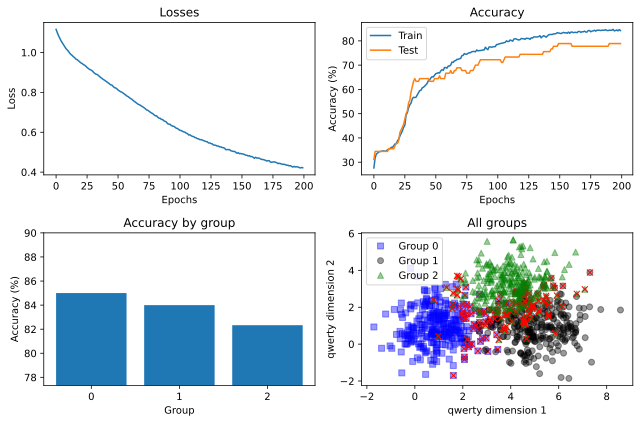

In [ ]:
# run the model and visualize the results
trainAcc, testAcc, losses, net = function2trainTheModel(False)
print('Final accuracy: %.2f%%' % testAcc[-1])
plotTheResults()

Final accuracy: 78.89%


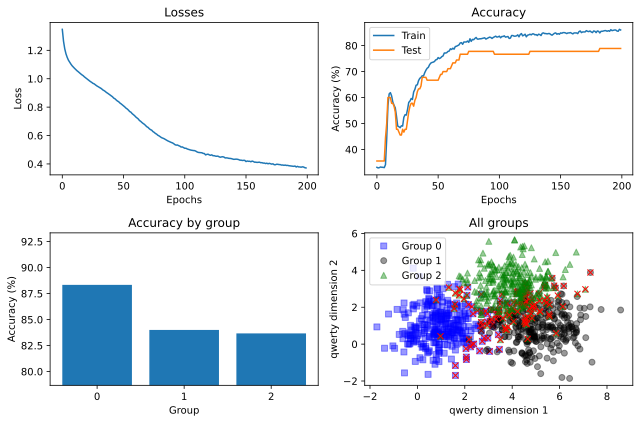

In [ ]:
# run the model and visualize the results
trainAcc, testAcc, losses, net = function2trainTheModel(True)
print('Final accuracy: %.2f%%' % testAcc[-1])
plotTheResults()

## Run the experiment!

In [ ]:
# Run the experiment multiple times and do a t-test!!

finalacc2 = np.zeros(10)
finalacc3 = np.zeros(10)

for i in range(10):
    finalacc2[i] = function2trainTheModel(False)[1][-1]
    finalacc3[i] = function2trainTheModel(True)[1][-1]

# show the nummbers
print( np.round(np.vstack((finalacc2, finalacc3)).T,2))

# run the t-test and print the results
t, p = stats.ttest_ind(finalacc3, finalacc2)
print('\n\nt=%.2f, p=%.2f' %(t,p))

[[78.89 81.11]
 [80.   82.22]
 [81.11 65.56]
 [77.78 82.22]
 [82.22 80.  ]
 [81.11 80.  ]
 [82.22 81.11]
 [82.22 83.33]
 [82.22 77.78]
 [81.11 82.22]]


t=-0.78, p=0.44


# Getting data into colab

## Import from torchvision

In [ ]:
# download the CIFAR10 dataset
cdata = torchvision.datasets.CIFAR10(root='cifar10', download=True)

cdata

100%|██████████| 170498071/170498071 [00:02<00:00, 84941817.10it/s]


Extracting cifar10/cifar-10-python.tar.gz to cifar10


Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10
    Split: Train

In [ ]:
# Datasets that com with torchvision: https://pytorch.org/vision/stable/index.html

## Download from the web

In [ ]:
# url
marriage_url = 'https://www.cdc.gov/nchs/data/dvs/state-marriage-rates-90-95-99-19.xlsx'

# import directly into pandas
data = pd.read_excel(marriage_url, header=5)
data.head()

,Unnamed: 0,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,8.2,8.4,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,7.2,7.8,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,5.6,5.7,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,10.9,10.4,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3


## Upload from hard drive

In [ ]:
from google.colab import files
uploaded = files.upload()

## Map your google-drive

In [ ]:
from google.colab import drive
drive.moount('/content/gdrive')

# Save and load trained models

## Import and process the data

In [ ]:
# import dataset
data = np.loadtxt(open('sample_data/mnist_train_small.csv', 'rb'), delimiter=',')

# extract labels and remove from data
labels = data[:, 0]
data = data[:, 1:]

# normalize the data to a range of [0 1]
dataNorm = data / np.max(data)

## Create train/test groups using DataLoader

In [ ]:
# Step 1 : convert to tensor
data_tensor = torch.tensor(dataNorm).float()
labels_tensor = torch.tensor(labels).long()

# Step 2 : split the data
train_data, test_data, train_labels, test_labels = train_test_split(data_tensor, labels_tensor, test_size=.1)

# Step 3 : convert into PyTorch Datasets
trainset = TensorDataset(train_data, train_labels)
testset = TensorDataset(test_data, test_labels)

# Step 4 : translate into dataloader objects
batchsize=32
train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
test_loader = DataLoader(testset, batch_size=testset.tensors[0].shape[0])

## Create the model

In [ ]:
# create a class for the model
def createTheMNISTNet():

    class mnistNet(nn.Module):
        def __init__(self):
            super().__init__()

            # input layer
            self.input = nn.Linear(784, 64)

            # hidden layer
            self.fc1 = nn.Linear(64,32)
            self.fc2 = nn.Linear(32,32)

            # output layer
            self.output = nn.Linear(32,10)

        # forward pass
        def forward(self,x):
            x = F.relu(self.input(x))
            x = F.relu(self.fc1(x))
            x = F.relu(self.fc2(x))
            return torch.log_softmax(self.output(x), axis=1)
            # log-softmax the output, because I'm using NLLLoss instead of CrossEntropyLoss

    # create the model instance
    net = mnistNet()

    # loss function
    lossfunc = nn.NLLLoss()

    # optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=.01)

    return net, lossfunc, optimizer

## Create a function that trains the model

In [ ]:
# a function that trains the model
def function2trainTheModel():

    # number of epochs
    numepochs = 10

    # create a new model
    net, lossfunc, optimizer = createTheMNISTNet()

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    testAcc = []

    # loop over epochs
    for epochi in range(numepochs):

        # loop over training data batches
        batchAcc = []
        batchLoss = []
        for X, y in train_loader:

            # forward pass and loss
            yHat = net(X)
            loss = lossfunc(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute accuracy
            batchAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )
        # end of batch loop...

        # training accuracy
        trainAcc.append(np.mean(batchAcc))

        # get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # test accuracy
        X, y = next(iter(test_loader))
        with torch.no_grad():
            yHat = net(X)

        testAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )
    # end epochs

    # function output
    return trainAcc, testAcc, losses, net

## Run the model and show the results!

In [ ]:
trainAcc, testAcc, losses, net = function2trainTheModel()

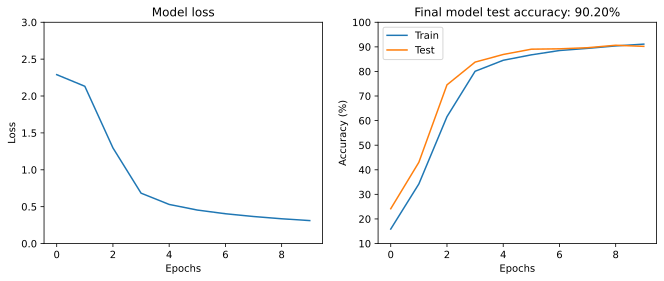

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(11,4))

ax[0].plot(losses)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_ylim([0,3])
ax[0].set_title('Model loss')

ax[1].plot(trainAcc, label='Train')
ax[1].plot(testAcc, label='Test')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_ylim([10,100])
ax[1].set_title(f'Final model test accuracy: {testAcc[-1]:.2f}%')
ax[1].legend()

plt.show()

## Save the trained model

In [ ]:
# save the model
torch.save(net.state_dict(), 'trainedModel.pt')

## Load in the model under a different name

In [ ]:
# create two new models of the same class
model1 = createTheMNISTNet()[0]
model2 = createTheMNISTNet()[0]

# replace one model's parameters with those of the trained net
model1.load_state_dict(torch.load('trainedModel.pt'))

<All keys matched successfully>

## Show that the two models are the same

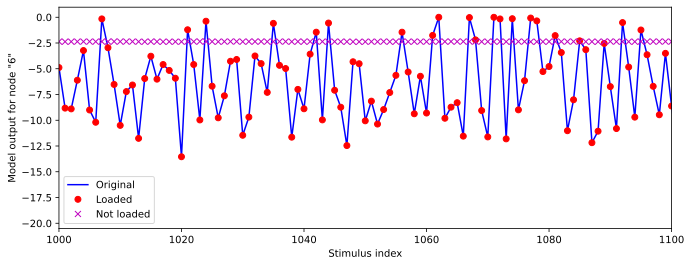

In [ ]:
# get some data from the test loader
X, y = next(iter(test_loader))

# run the data through both models
yHatNet = net(X)
yHatModel1 = model1(X)
yHatModel2 = model2(X)

# show that the results overlap
fig = plt.figure(figsize=(11,4))
plt.plot(yHatNet[:,5].detach(), 'b', label='Original')
plt.plot(yHatModel1[:,5].detach(), 'ro', label='Loaded')
plt.plot(yHatModel2[:,5].detach(), 'mx', label='Not loaded')
plt.legend()
plt.xlabel('Stimulus index')
plt.ylabel('Model output for node "6"')
plt.xlim([1000,1100])

plt.show()

# Save the best-performing model

In [ ]:
'''
* How to record the best of the models you created and trained.
* How to avoid overfitting when saving the best devset model.

* Why save the best model?
- Each epoch is a "different" model (the weights differ).
- The later models will be better than the earlier models.
- But there is no gaurantee that the final model is the best!

- Train a model (3-class qwerties.)
- Track performance inside the loop over training epochs.
- Save (and export) the model state that maximizes devset accuracy.
- Evaluate that model on the separate TEST set.

'''

## A brief aside on saving the highest of random numbers

In [2]:
theBest = [0,0]

for i in range(10):

    # "train the model"
    accuracy = np.random.rand()

    # see if this is better than any previous runs
    if accuracy > theBest[0]:
        theBest = [accuracy, i]

print(f'Highest "accuracy" wat {100 * theBest[0]:.2f}% in run {theBest[1]+1}.')

Highest "accuracy" wat 98.71% in run 3.


## Create and inspect the data

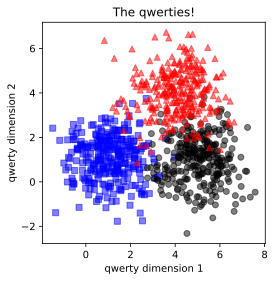

In [28]:
# create data
nPerClust = 300
blur = 1

A = [1,1]
B = [5,1]
C = [4,4]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]
c = [ C[0]+np.random.randn(nPerClust)*blur , C[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.hstack((  np.zeros((nPerClust)),
                         np.ones( (nPerClust)),
                       1+np.ones( (nPerClust))  ))

# concatenate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).long()

# show the data
fig = plt.figure(figsize=(4,4))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs',alpha=.5)
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko',alpha=.5)
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^',alpha=.5)
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [29]:
# specify sizes of the partitions
# order is train, val, test
partitions = [3*nPerClust-400, 200, 200]

# split the data
train_data, valtest_data, train_labels, valtest_labels = train_test_split(data, labels, train_size=partitions[0])

# now split the valtest data
val_data, test_data, val_labels, test_labels = train_test_split(valtest_data, valtest_labels, train_size=partitions[1])

# print out the sizes
print('Total data size: ' + str(data.shape) + '\n')
print('Training data size: ' + str(train_data.shape))
print('Validation data size: ' + str(val_data.shape))
print('Test data size: ' + str(test_data.shape))

Total data size: torch.Size([900, 2])

Training data size: torch.Size([500, 2])
Validation data size: torch.Size([200, 2])
Test data size: torch.Size([200, 2])


In [30]:
# then convert into PyTorch Datasets
trainset = TensorDataset(train_data, train_labels)
valset = TensorDataset(val_data, val_labels)
testset = TensorDataset(test_data, test_labels)

# translate into dataloader objects
batchsize=30
train_loader = DataLoader(trainset, batch_size=batchsize, shuffle=True, drop_last=True)
val_loader = DataLoader(valset, batch_size=valset.tensors[0].shape[0])
test_loader = DataLoader(testset, batch_size=testset.tensors[0].shape[0])

## Create and validate the model

In [31]:
# create a class for the model
def createTheQwertyNet():

    class qwertyNet(nn.Module):
        def __init__(self):
            super().__init__()

            # input layer
            self.input = nn.Linear(2,8)

            # hidden layer
            self.hidden = nn.Linear(8,8)

            # output layer
            self.output = nn.Linear(8,3)

        # forward pass
        def forward(self, x):
            x = F.relu(self.input(x))
            x = F.relu(self.hidden(x))
            return self.output(x)

    # create the model instance
    net = qwertyNet()

    # loss function
    lossfunc = nn.CrossEntropyLoss()

    # optimizer
    optimizer = torch.optim.SGD(net.parameters(), lr=.01)

    return net, lossfunc, optimizer

## A function that trains the model

In [32]:
def function2trainTheModel():

    # initialize a dictionary for the best model
    theBestModel = {'Accuracy':0, 'net':None}

    # number of epochs
    numepochs = 100

    # create a new model
    net, lossfunc, optimizer = createTheQwertyNet()

    # initialize losses
    losses = torch.zeros(numepochs)
    trainAcc = []
    valAcc = []

    # loop over epochs
    for epochi in range(numepochs):

        # switch on training mode
        net.train()

        # loop over training data batches
        batchAcc = []
        batchLoss = []
        for X, y in train_loader:

            # forward pass and loss
            yHat = net(X)
            loss = lossfunc(yHat, y)

            # backprop
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # loss from this batch
            batchLoss.append(loss.item())

            # compute accuracy
            batchAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

        # get average training accuracy
        trainAcc.append( np.mean(batchAcc) )

        # get average losses across the batches
        losses[epochi] = np.mean(batchLoss)

        # val accuracy
        net.eval()
        X, y = next(iter(val_loader))
        with torch.no_grad():
            yHat = net(X)

        valAcc.append( 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item() )

        # Store this model if it's the best so far
        if valAcc[-1] > theBestModel['Accuracy']:

            # new best accuracy
            theBestModel['Accuracy'] = valAcc[-1]

            # model's internal state
            theBestModel['net'] = copy.deepcopy( net.state_dict() )

    # end epochs

    # function output
    return trainAcc, valAcc, losses, theBestModel

## Run the model and plot the results

In [33]:
# run the model
trainAcc, valAcc, losses, theBestModel = function2trainTheModel()

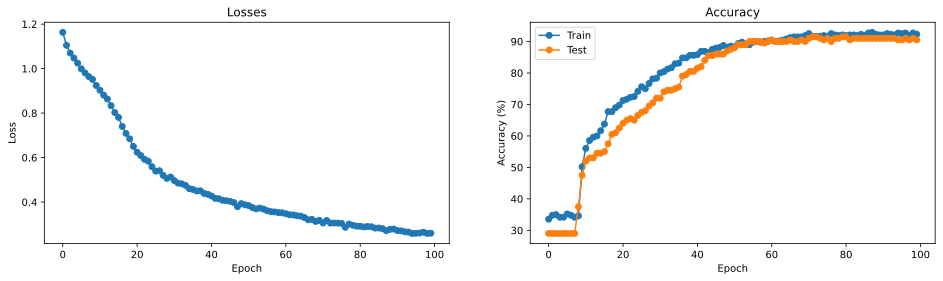

In [34]:
fig, ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(losses.detach(), 'o-')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_title('Losses')

ax[1].plot(trainAcc, 'o-', label='Train')
ax[1].plot(valAcc, 'o-', label='Test')
ax[1].set_ylabel('Accuracy (%)')
ax[1].set_xlabel('Epoch')
ax[1].set_title('Accuracy')
# ax[1].set_ylim([85,95])
# ax[1].set_xlim([80,105])
ax[1].legend()

plt.show()

In [35]:
theBestModel

{'Accuracy': 91.50000214576721,
 'net': OrderedDict([('input.weight',
               tensor([[ 0.6848,  0.7324],
                       [-0.1028, -0.6200],
                       [-0.1506,  0.4450],
                       [ 0.3788, -0.4593],
                       [ 0.9048, -0.5512],
                       [ 0.4144, -0.4358],
                       [-0.1212,  0.3567],
                       [-0.1476,  0.7465]])),
              ('input.bias',
               tensor([-0.6266, -0.2914, -0.1623,  0.2043, -0.3754, -0.2396,  0.2139,  0.1615])),
              ('hidden.weight',
               tensor([[ 0.4858,  0.2204,  0.2826, -0.4485, -0.2558, -0.2717,  0.3489,  0.2044],
                       [-0.3478, -0.1418, -0.1593,  0.1848, -0.1297,  0.0582, -0.0860, -0.1505],
                       [ 0.3593,  0.0487, -0.2761,  0.0053,  0.7017,  0.0617, -0.0803, -0.1536],
                       [ 0.6218,  0.2952, -0.2077, -0.1546, -0.2786, -0.3860,  0.0488,  0.3597],
                       [-0.0530, -0.

In [36]:
# recreate the best-performing model
bestnet = createTheQwertyNet()[0]
bestnet.load_state_dict(theBestModel['net'])

# extract X, y from test loader
X, y = next(iter(test_loader))

# and run the data through TEST
yHat = bestnet(X)

bestAcc = 100 * torch.mean((torch.argmax(yHat, axis=1)==y).float()).item()
bestAcc

91.00000262260437

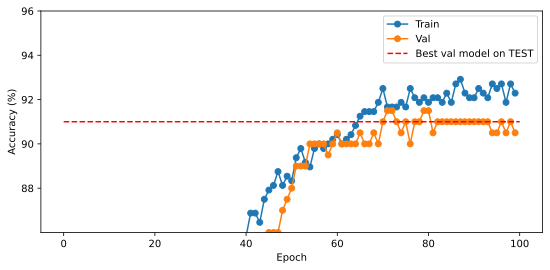

In [37]:
fig = plt.figure(figsize=(9,4))

plt.plot(trainAcc, 'o-', label='Train')
plt.plot(valAcc, 'o-', label='Val')
plt.plot([0, len(valAcc)], [bestAcc, bestAcc], 'r--', label='Best val model on TEST')
plt.ylabel('Accuracy (%)')
plt.xlabel('Epoch')
plt.ylim([bestAcc-5, bestAcc+5])
plt.legend()
plt.show()

# Where to find on-line datasets

In [ ]:
'''
- kaggle
'''